In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Generate a simple training data set</h2>

In [2]:
x = np.arange(0,8*np.pi, 0.001)
e1 = np.random.randn(len(x))
y = np.sin(x) + e1
e2 = np.random.randn(len(x))
y_test = np.sin(x) + e2
len(x)

25133

Above is not a proper way to sample from the given distribution, instead one should sample randomly from the generated distribution:

In [3]:
train_idx = np.random.choice(np.arange(0,len(x)), 1000) 
train_x = np.array([x[idx] for idx in train_idx])
train_y = np.array([y[idx] for idx in train_idx])

test_idx = np.random.choice(np.arange(0,len(x)), 1000) 
test_x = np.array([x[idx] for idx in test_idx])
test_y = np.array([y[idx] for idx in test_idx])

train_x.shape


(1000,)

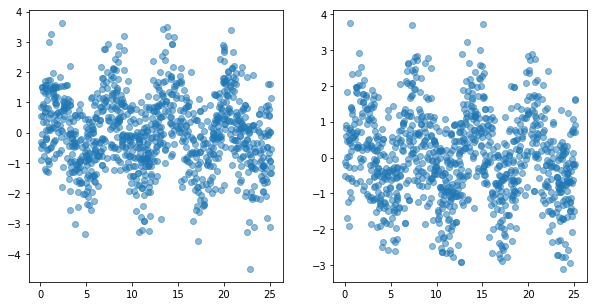

In [4]:
f, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(train_x, train_y, alpha = 0.5)
ax[1].scatter(test_x, test_y,alpha = 0.5)
plt.show()

<h2>Fit a polynomial regression to the data set and visualize its predictions.</h2>

Simple 1-dim polynomial regression with given degree p

In [5]:
def simple_one_dim_poly_reg(x,y,p):
    X = np.transpose([ x**i for i in np.arange(0,p+1) ])
    beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    Y_hat = X.dot(beta)
    RSS = sum((y-Y_hat)**2)
    return(Y_hat, beta, RSS)

<h3> Select optimal degree of freedom</h3>

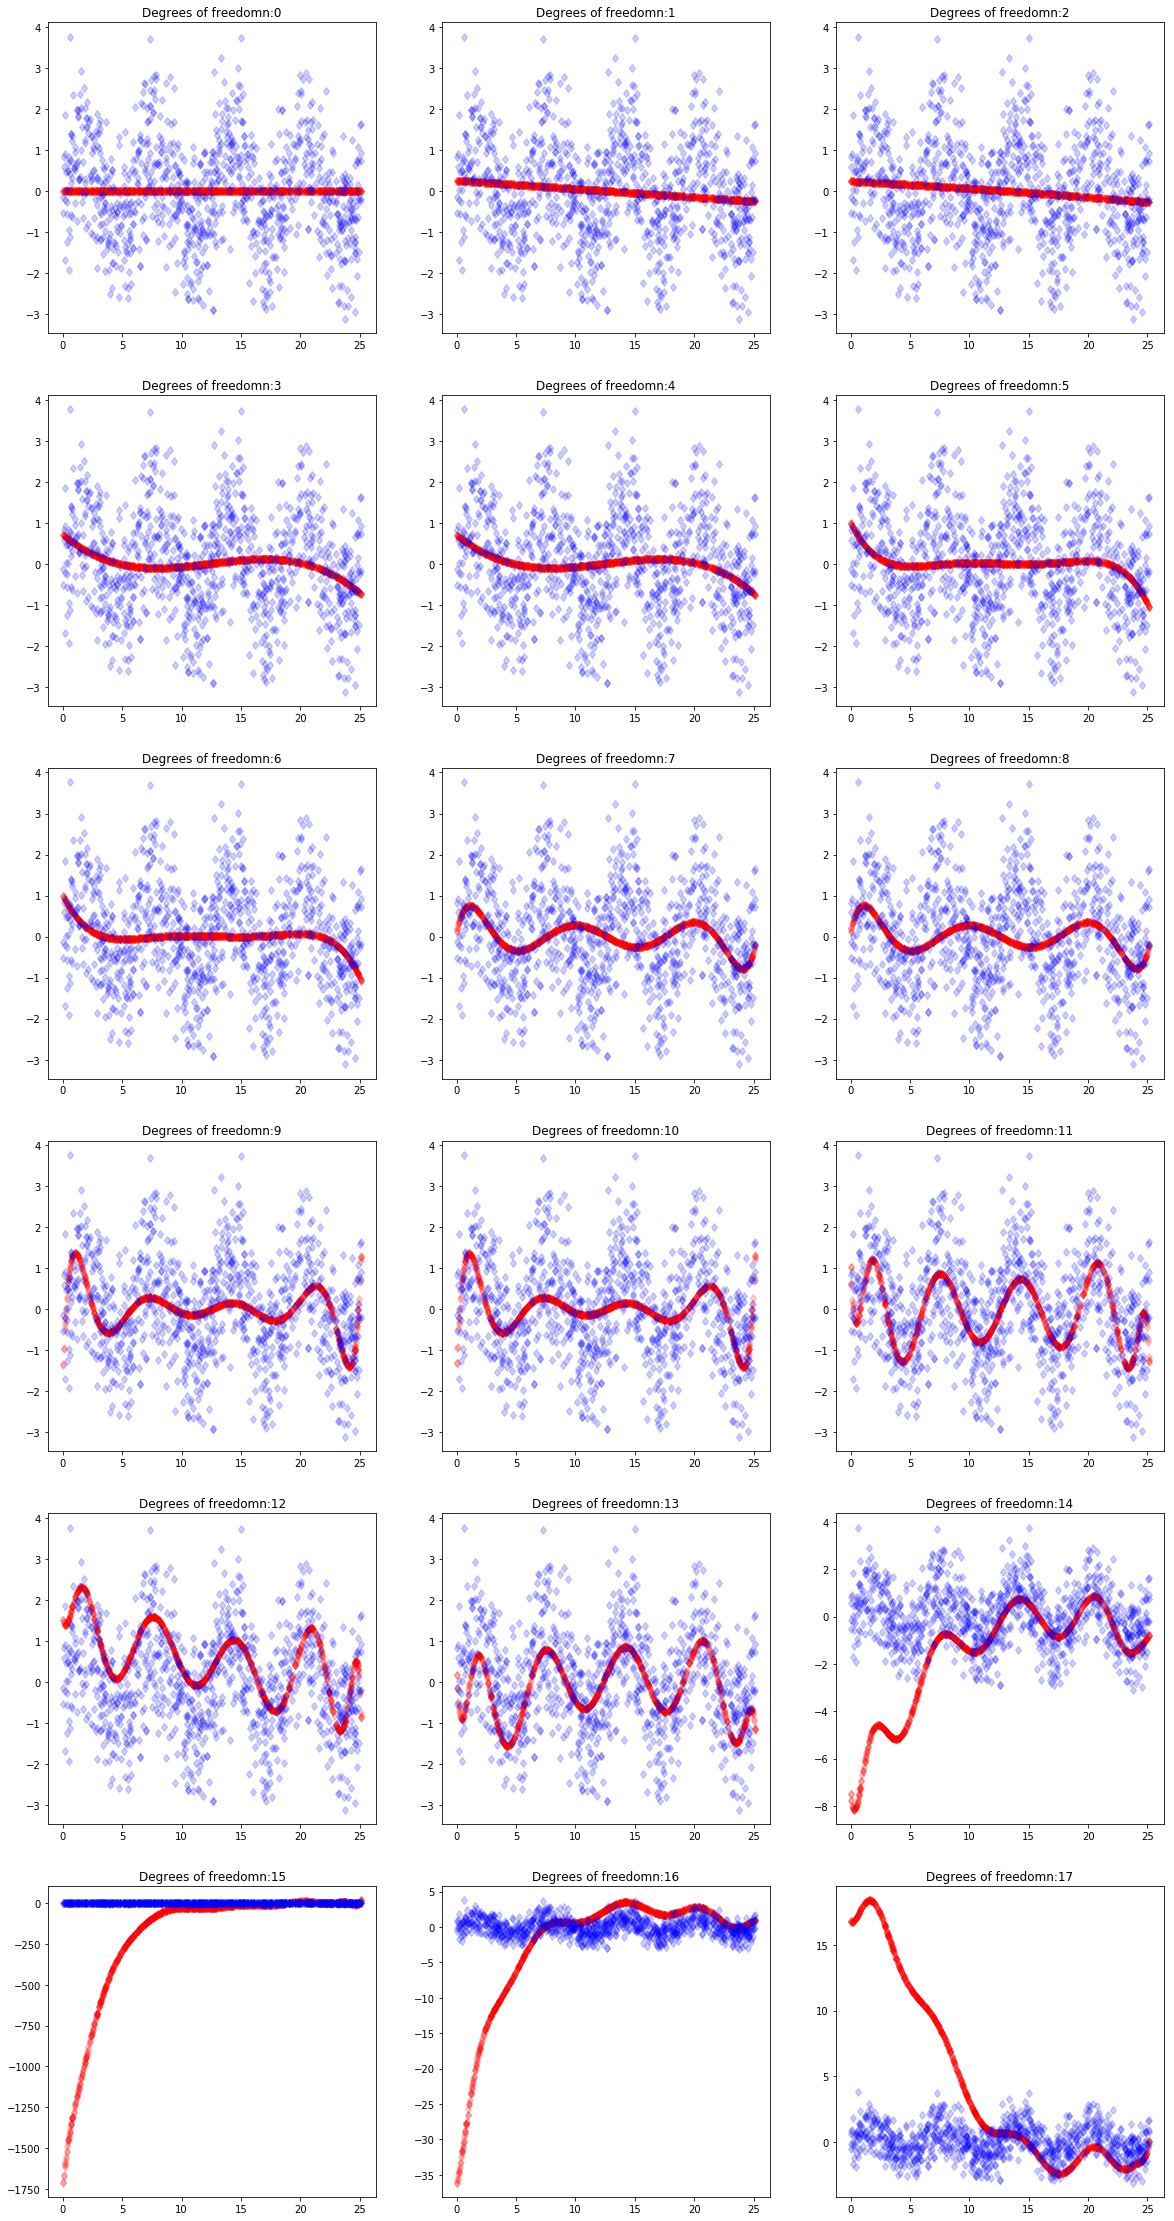

In [6]:
Y_hats = []
betas = []
RSSs = []
RSSs_val = []

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 40))
pltrow = 0
pltcol = 0


for i in range(0,18):
    #y_hat = simple_one_dim_poly_reg(x,y,i)[0]
    
    beta = simple_one_dim_poly_reg(x,y,i)[1]
    #RSS = simple_one_dim_poly_reg(x,y,i)[2]
    X = np.transpose([ test_x**i for i in np.arange(0,i+1) ])
    Y_hat = X.dot(beta)
    RSS = sum((test_y-Y_hat)**2)
    
    Y_hats.append(Y_hat)
    betas.append(beta)
    RSSs.append(RSS)
    #RSSs_val.append(RSS_val)
    pltrow = int(i / 3)
    pltcol = i % 3
    axes[pltrow,pltcol].plot(test_x,Y_hat, 'r', linestyle = 'none', marker = 'd', alpha = 0.2 )
    axes[pltrow,pltcol].plot(test_x,test_y,'b', linestyle = 'none', marker = 'd',alpha = 0.2)
    title = 'Degrees of freedomn:' + str(i)
    axes[pltrow,pltcol].set_title(title)
    #axes[pltrow,pltcol].set_ylim([2,2])
    #plt.ylim(-5,5)

    
plt.show()

In [7]:
print('Optimal Degree of Polynomial regression: ' + str(np.argmin(RSSs)))

Optimal Degree of Polynomial regression: 11


<h3>Plot estimate over original data generation function </h3>

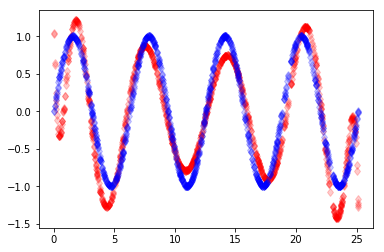

In [8]:
plt.plot(test_x,Y_hats[11], 'r', linestyle = 'none',marker = 'd', alpha = 0.2)
plt.plot(test_x,np.sin(test_x),'b', linestyle = 'none',marker = 'd', alpha = 0.2)

plt.show()

Since I didn't understand the lagrange optimization, I used Residual Sum of Squares in order to select the optimal degree of freedom. The plot over the data generation function shows, that it worked quite well.

<h2>Fit a kernel regression to the data. <br> Determine lambda using cross-validation and visualize your results.</h2>

In [9]:
def kernel_transformation(X, lamb):
    boo = np.array(X)
    #clone the X column n times
    expanded = np.transpose(np.reshape(np.array([np.reshape(boo, [len(boo),1])]*len(boo)),[len(boo),len(boo)]))
    #duplicate each value of X n times and aligne them to columns
    subtract = np.array([boo]*len(boo)) 
    #plug in formular
    transformed = np.exp(1/lamb * np.abs(expanded - subtract)**2)
    return transformed

In [21]:
def kernel_reg(x,y,lamb):
    X = kernel_transformation(x, lamb)
    beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    Y_hat = X.dot(beta)
    RSS = sum((y-Y_hat)**2)
    return(Y_hat, beta, RSS)

In [28]:
kernel_reg(train_x, train_y, lamb)[2]

9.0274039137505147e+62

In [41]:
Y_hats = []
betas = []
RSSs = []
RSSs_val = []

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 40))
pltrow = 0
pltcol = 0


for lamb in range(2,100):
    #y_hat = simple_one_dim_poly_reg(x,y,i)[0]
    print(lamb) # lamb = 7 raises Error singular matrix
    if lamb == 7 or lamb == 22 or lamb == 28 or lamb == 29:
        continue 
    beta = kernel_reg(train_x, train_y, lamb)[1]
    #RSS = simple_one_dim_poly_reg(x,y,i)[2]
    X = kernel_transformation(test_x, lamb)
    Y_hat = X.dot(beta)
    RSS = sum((test_y-Y_hat)**2)
    
    Y_hats.append(Y_hat)
    betas.append(beta)
    RSSs.append(RSS)
    #RSSs_val.append(RSS_val)
    #pltrow = int(i / 3)
    #pltcol = i % 3
    #axes[pltrow,pltcol].plot(test_x,Y_hat, 'r', linestyle = 'none', marker = 'd', alpha = 0.2 )
    #axes[pltrow,pltcol].plot(test_x,test_y,'b', linestyle = 'none', marker = 'd',alpha = 0.2)
    #title = 'Degrees of freedomn:' + str(i)
    #axes[pltrow,pltcol].set_title(title)
    #axes[pltrow,pltcol].set_ylim([2,2])
    #plt.ylim(-5,5)

    
#plt.show()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


LinAlgError: Singular matrix

To-Do: deal with singluar matrices --> regularization?

In [43]:
np.argmin(RSSs)

24

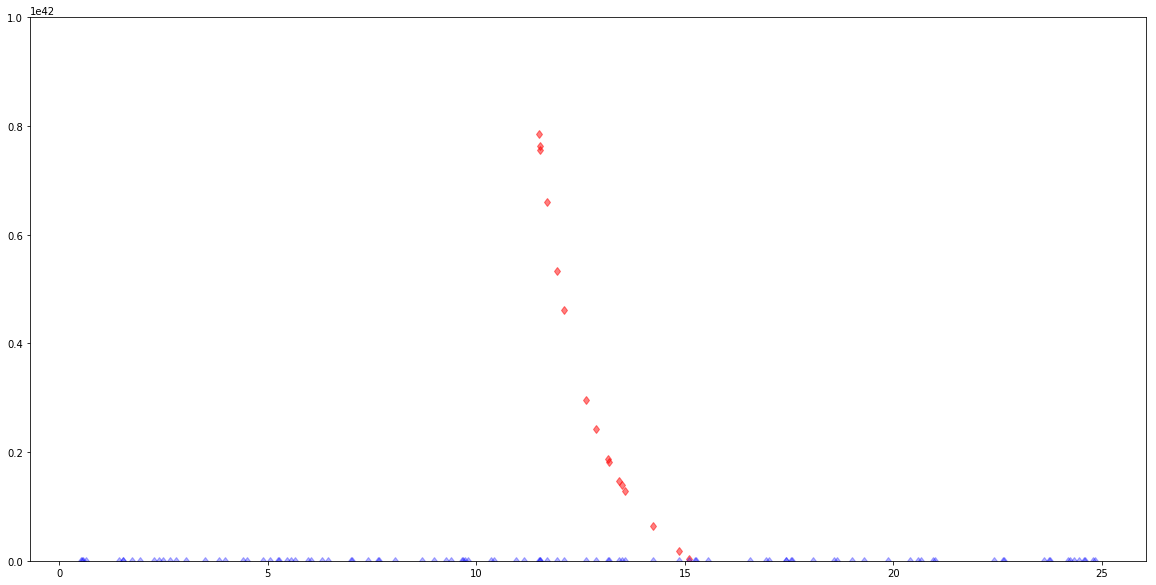

In [91]:
plt.figure(figsize=(20,10))
plt.ylim(-1, 1e42)
a = Y_hats[24][0::10]
b = test_x[0::10]
c = test_y[0::10]
             
plt.plot(b,a, 'r', linestyle = 'none',marker = 'd', alpha = 0.5)
plt.plot(b,c,'b', linestyle = 'none',marker = 'd', alpha = 0.3)

plt.show()